In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv


In [2]:
df = pd.read_csv("/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv")
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.shape

(500, 9)

In [5]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [6]:
df.columns

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

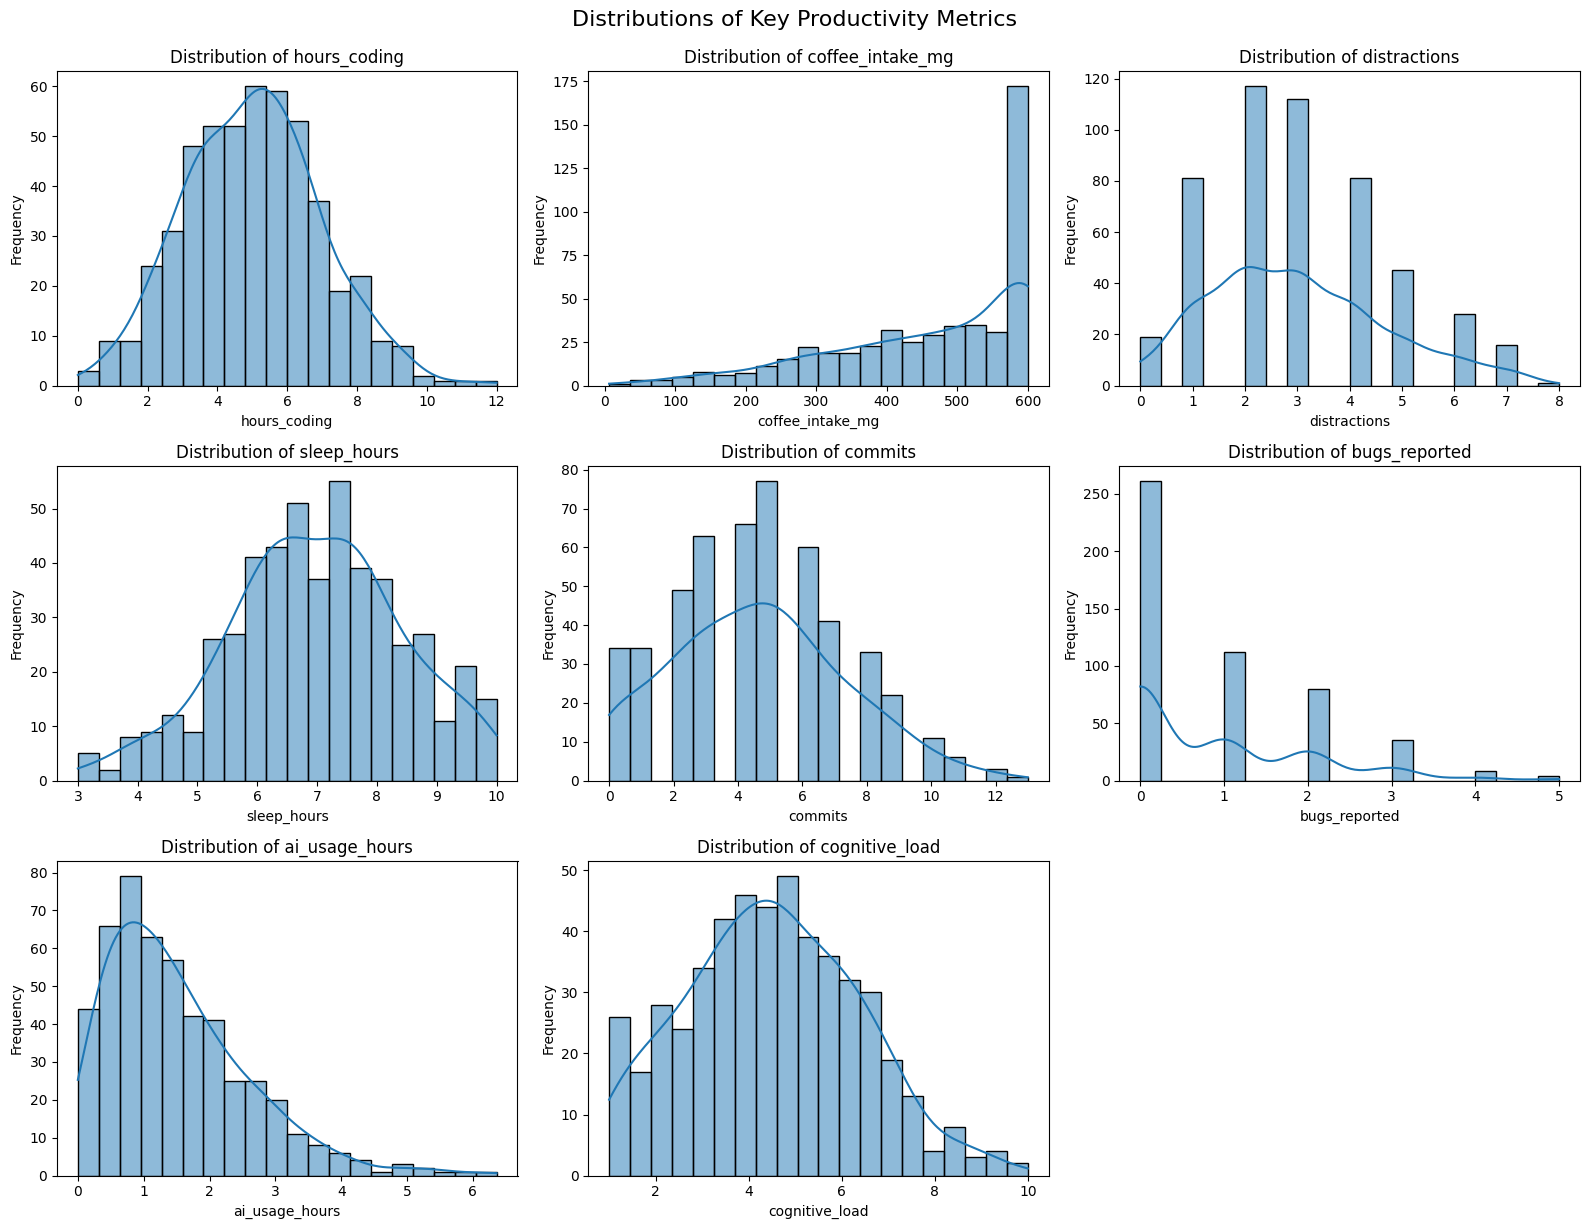

In [8]:
# Distribution of Numerical Features

numerical_cols = ['hours_coding','coffee_intake_mg', 'distractions', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.suptitle('Distributions of Key Productivity Metrics', y=1.02, fontsize=16)
plt.show()

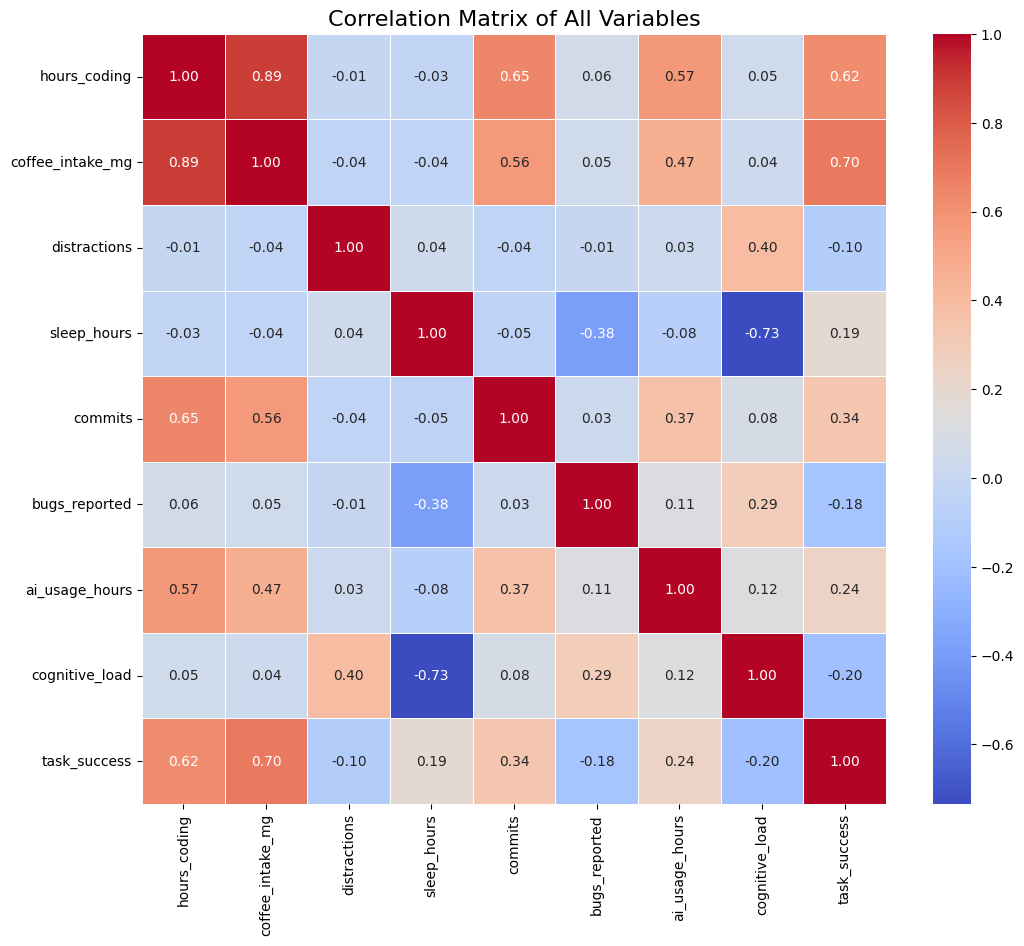


------------ Correlation with Task Success --------------
task_success        1.000000
coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
sleep_hours         0.186662
distractions       -0.104303
bugs_reported      -0.178226
cognitive_load     -0.199840
Name: task_success, dtype: float64


In [9]:
# Correlation Analysis - to understand Feature Importance by establishing linear relationships between variables

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=.5)
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()

print("\n------------ Correlation with Task Success --------------")
print(df.corr()['task_success'].sort_values(ascending=False))

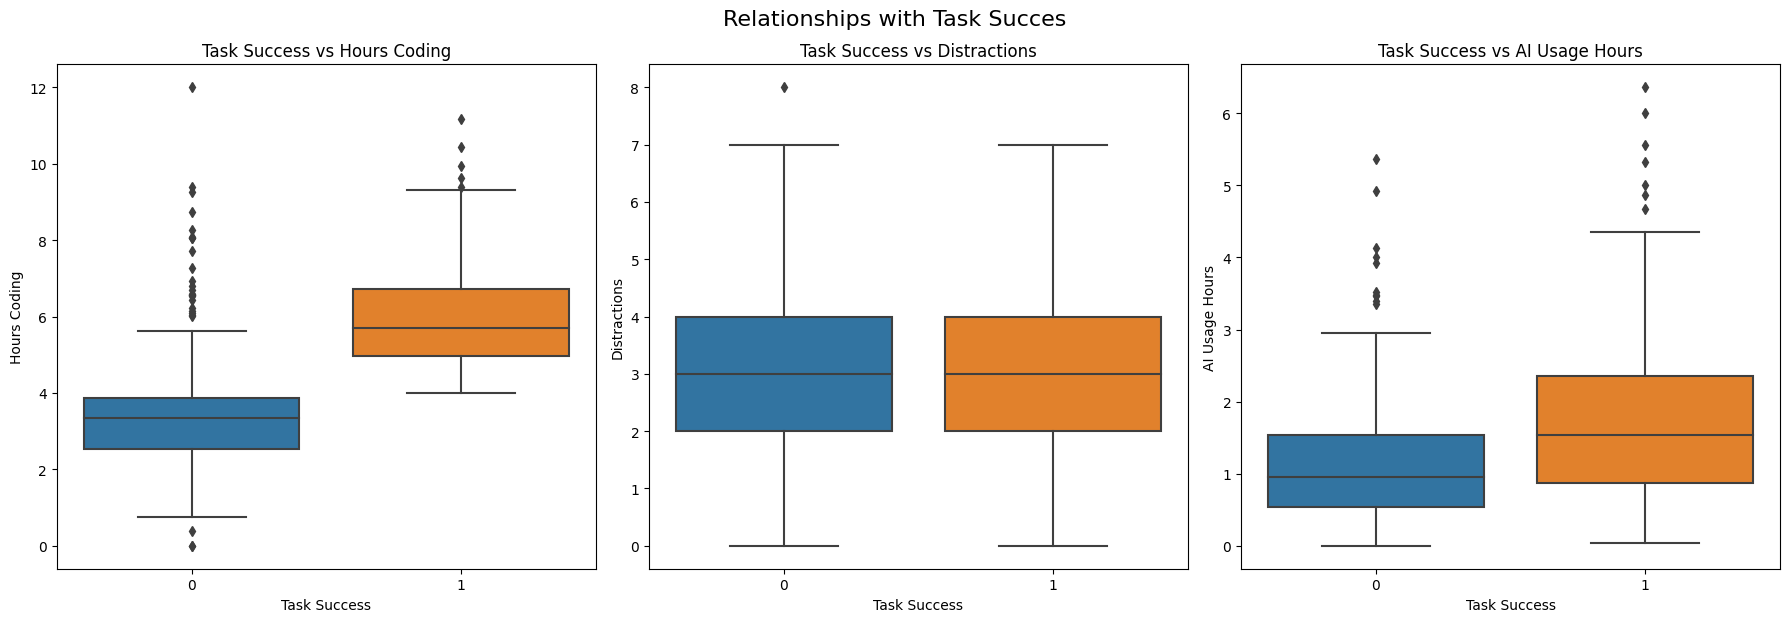

In [10]:
# Feature Relationships with Target Variable

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='task_success', y='hours_coding', data=df, ax=axes[0])
axes[0].set_title('Task Success vs Hours Coding')
axes[0].set_xlabel('Task Success')
axes[0].set_ylabel('Hours Coding')

sns.boxplot(x='task_success', y='distractions', data=df, ax=axes[1])
axes[1].set_title('Task Success vs Distractions')
axes[1].set_xlabel('Task Success')
axes[1].set_ylabel('Distractions')

sns.boxplot(x='task_success', y='ai_usage_hours', data=df, ax=axes[2])
axes[2].set_title('Task Success vs AI Usage Hours')
axes[2].set_xlabel('Task Success')
axes[2].set_ylabel('AI Usage Hours')

plt.tight_layout()
plt.suptitle('Relationships with Task Succes', y=1.03, fontsize=16)
plt.show()

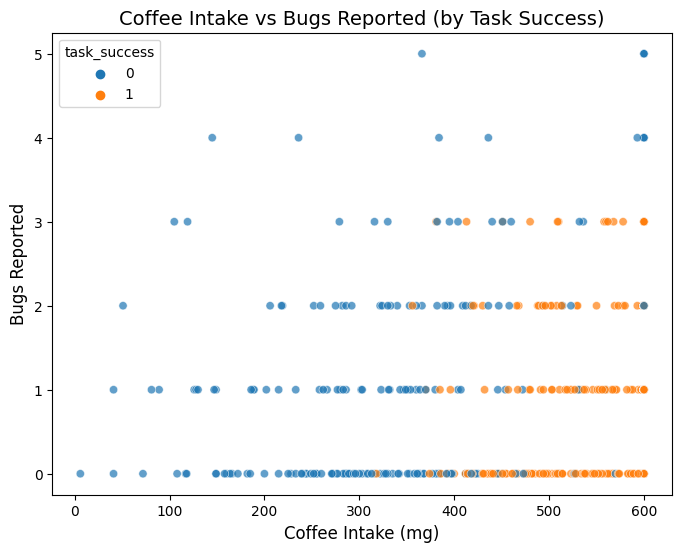

In [11]:
# caffeine vs bugs

plt.figure(figsize=(8, 6))
sns.scatterplot(x='coffee_intake_mg', y='bugs_reported', hue='task_success', data=df, alpha=0.7)
plt.title('Coffee Intake vs Bugs Reported (by Task Success)', fontsize=14)
plt.xlabel('Coffee Intake (mg)', fontsize=12)
plt.ylabel('Bugs Reported', fontsize=12)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Binary classification: Predicting task_success
# Goal: Determine if a developer will achieve their daily productivity goal

X = df.drop('task_success', axis=1)
y = df['task_success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

In [15]:
# Model 1: Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr): .4f}')
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))

Accuracy:  0.8500
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.90      0.86      0.88        66

    accuracy                           0.85       100
   macro avg       0.83      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix: 
 [[28  6]
 [ 9 57]]


In [16]:
# Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # random forest works well without explicitly feature scaling
y_pred_rf = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf): .4f}')
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

Accuracy:  1.0000
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix: 
 [[34  0]
 [ 0 66]]



 Feature Importance from Random Forest Classifier: 
hours_coding        0.384605
coffee_intake_mg    0.288079
cognitive_load      0.144733
sleep_hours         0.054986
commits             0.044870
bugs_reported       0.038776
ai_usage_hours      0.031459
distractions        0.012493
dtype: float64


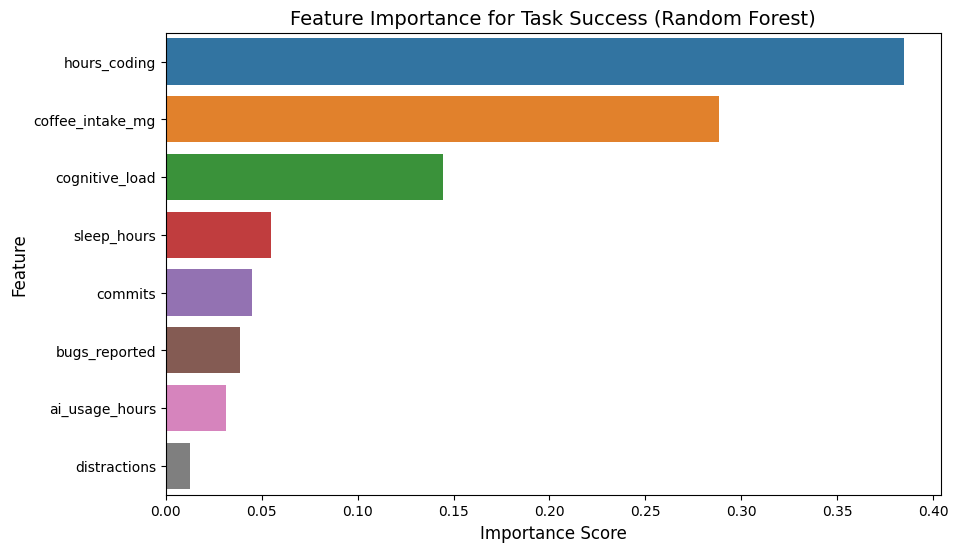

In [17]:
# feature importance from random forest - which factors are most influential in predicting task_success

print("\n Feature Importance from Random Forest Classifier: ")
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance for Task Success (Random Forest)', fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [18]:
# Regression: Predicting cognitive_load
# Goal: Predict the self-reported mental strain on a daily basis

X = df.drop('cognitive_load', axis=1)
y = df['cognitive_load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Gradient Boosting Regressor results (Cognitive Load Prediction): 
Mean Squared Error (MSE):  0.8520
R2 Score:  0.6885


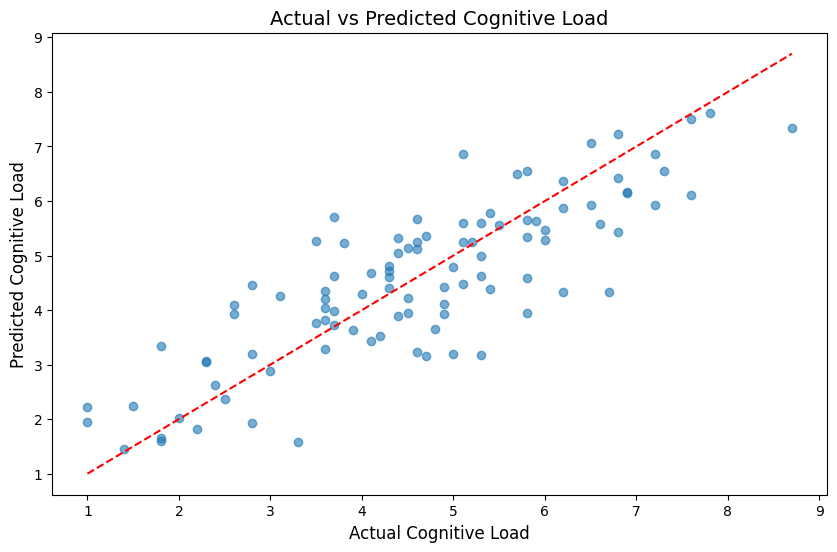

In [19]:
# Model : Gradient Boosting Regressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

print("\n Gradient Boosting Regressor results (Cognitive Load Prediction): ")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gbr): .4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_gbr): .4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Cognitive Load", fontsize=14)
plt.xlabel("Actual Cognitive Load", fontsize=12)
plt.ylabel("Predicted Cognitive Load", fontsize=12)
plt.show()

# MSE shows the average squared difference between predictions and actual values (lower is better).
# R2 score tells how much of the variance in the target variable your model explains (closer to 1 is better)

### How does caffeine impact bugs in code?


--- Impact of Caffeine on Bugs ---
Pearson Correlation between Coffee Intake and Bugs Reported: 0.0463


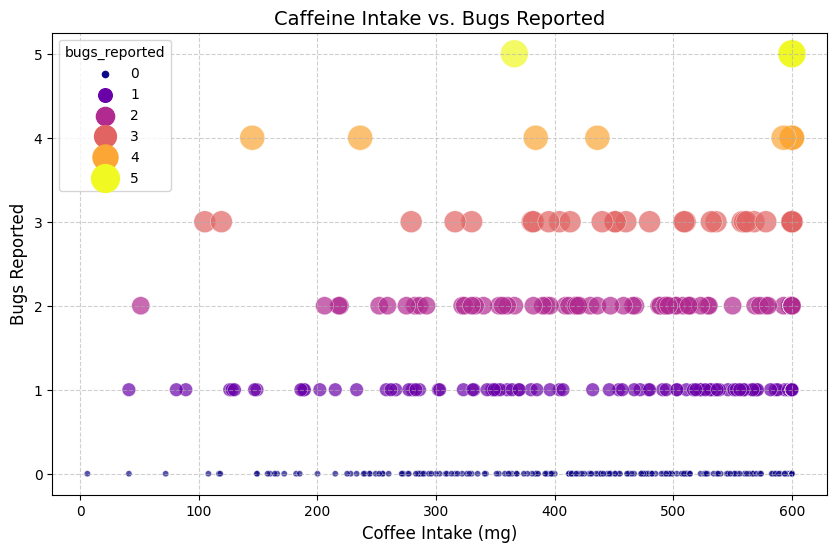

In [20]:
correlation_coffee_bugs, _ = pearsonr(df['coffee_intake_mg'], df['bugs_reported'])
print(f"\n--- Impact of Caffeine on Bugs ---")
print(f"Pearson Correlation between Coffee Intake and Bugs Reported: {correlation_coffee_bugs:.4f}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='coffee_intake_mg', y='bugs_reported', data=df, hue='bugs_reported', size='bugs_reported', sizes=(20, 400), palette='plasma', alpha=0.7)
plt.title('Caffeine Intake vs. Bugs Reported', fontsize=14)
plt.xlabel('Coffee Intake (mg)', fontsize=12)
plt.ylabel('Bugs Reported', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Can you predict if a dev will succeed today based on distractions and AI tool use?

In [21]:
# Already predicted, task success calssification model

X_dist_ai = df[['distractions', 'ai_usage_hours']]
y_success = df['task_success']

X_train, X_test, y_train, y_test = train_test_split(X_dist_ai, y_success, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f"\n Logistic Regression (Distractions + AI Usage only) Results: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
print(f"Classification Report: \n", classification_report(y_test, y_pred))


 Logistic Regression (Distractions + AI Usage only) Results: 
Accuracy:  0.6100
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.29      0.34        34
           1       0.68      0.77      0.72        66

    accuracy                           0.61       100
   macro avg       0.54      0.53      0.53       100
weighted avg       0.58      0.61      0.59       100



### What's the optimal balance between AI usage and raw coding time?

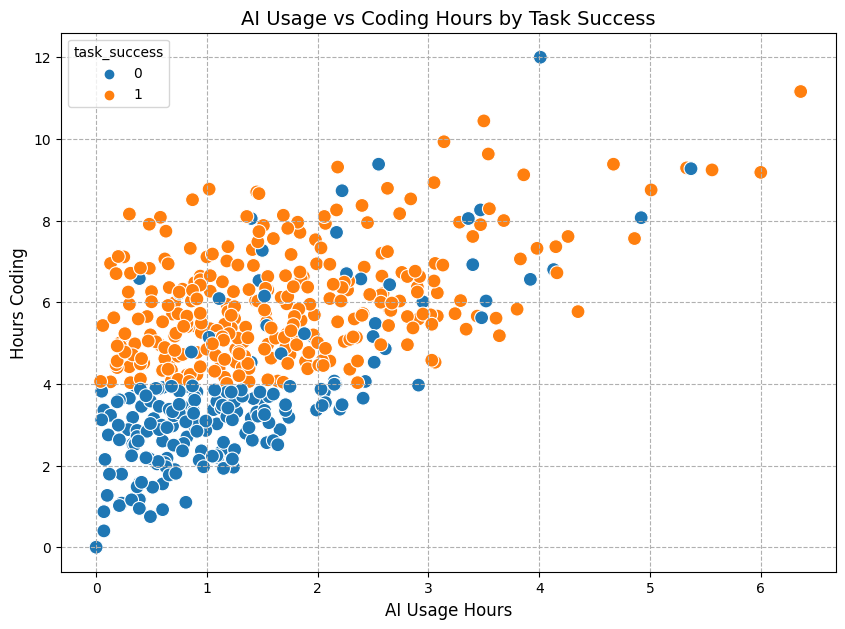

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='ai_usage_hours', y='hours_coding', hue='task_success', data=df, s=100)
plt.title("AI Usage vs Coding Hours by Task Success", fontsize=14)
plt.xlabel("AI Usage Hours", fontsize=12)
plt.ylabel('Hours Coding', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()